In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris

# step activation function
def step(weighted_sum):
    if weighted_sum <= 0:
        return 0
    else:
        return 1


# sigmoid activation function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def cross_entropy(a, y):
    return -np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))


def mean_squared(a, y):
    return np.sum((a - y) ** 2) / y.size


In [2]:
class BC:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


class MultilayerNetwork:
    def __init__(self, input_layer, hidden_layer, output_layer):
        """A self-adjusting algorithm that changes its weights and bias with each iteration.

        Args:
            input_layer: number of inputs (short: in)
            hidden_layer: number of hidden layers (short: hid)
            output_layer: number of outputs (short: out)
        """

        self.input_layer = input_layer
        self.output_layer = output_layer

        # Ensure the seed for randomness elicits the same results.
        np.random.seed(98661613)

        # Size of matrix for bias is always 1
        self.weights_in_hid = np.random.randn(hidden_layer, input_layer)
        self.bias_hid = np.random.randn(hidden_layer, 1)

        self.weights_hid_out = np.random.randn(output_layer, hidden_layer)
        self.bias_out = np.random.randn(output_layer, 1)

    def feed_forward(self, inputs):
        """Multiply the weight with the input and add it to bias

        Args:
            inputs: Inputs are determined by user and are used to predict the output.

        Returns: The predicted output using the current training level.

        """

        # Neuron layer 2 is the hidden layer, neuron layer 3 is the output layer.
        sigmoid_neuron_2 = sigmoid(self.weights_in_hid.dot(inputs.T) + self.bias_hid)
        sigmoid_neuron_3 = sigmoid(self.weights_hid_out.dot(sigmoid_neuron_2) + self.bias_out)

        # Return output layer sigmoid neuron.
        return sigmoid_neuron_3

    def predict(self, unknown):
        """Method used for predicting the output given a new input.

        Args:
            unknown: The new input that is not part of the original dataset.

        Returns: The predicted output.

        """

        unknown = self.feed_forward(unknown)
        data = list()

        for x in unknown:
            if x > 0.7:
                data.append(1)
            else:
                data.append(0)
        return data

    def back_prop(self, input_data_set, output_data_set):
        """Method used to traverse forward and backward through the neural network once per iteration.

        Args:
            input_data_set: Input data for training.
            output_data_set: Output data for training.

        Returns: Adjustments done per iteration.

        """

        # Number of training vectors
        n = len(output_data_set)

        # Delta stands for change.
        delta_weight_in_hid = np.zeros(self.weights_in_hid.shape, dtype=float)
        delta_bias_hid = np.zeros(self.bias_hid.shape, dtype=float)

        delta_weight_hid_out = np.zeros(self.weights_hid_out.shape, dtype=float)
        delta_bias_out = np.zeros(self.bias_out.shape, dtype=float)

        cost = 0.0

        for single_input, single_output in zip(input_data_set, output_data_set):

            # ===== INPUT SIGNALS =====

            single_input = single_input.reshape(self.input_layer, 1)
            single_output = single_output.reshape(self.output_layer, 1)

            hid_neuron_value = self.weights_in_hid.dot(single_input) + self.bias_hid
            activation_2 = sigmoid(hid_neuron_value)

            out_neuron_value = self.weights_hid_out.dot(activation_2) + self.bias_out
            activation_3 = sigmoid(out_neuron_value)

            # ===== ERROR SIGNALS =====

            # Using cross-entropy removes the need to multiply by the derivative of output to get the error
            error_out = (activation_3 - single_output)  # * cf.sigmoid_prime(out_neuron_value)
            error_hid = sigmoid_prime(hid_neuron_value) * (self.weights_hid_out.T.dot(error_out))

            delta_bias_out += error_out
            delta_weight_hid_out += error_out.dot(activation_2.T)

            delta_bias_hid += error_hid
            delta_weight_in_hid += error_hid.dot(single_input.T)

            # cost += cf.mean_squared(activation_3, single_output)
            cost += cross_entropy(activation_3, single_output)

        return (delta_bias_hid / n, delta_weight_in_hid / n, delta_bias_out / n, delta_weight_hid_out / n,
                cost / n)

    def train(self, epochs, eta, input_data_set, output_data_set):
        """
        Method used for training the algorithm.
        Args:
            epochs: Iterations.
            eta: Learning rate.
            input_data_set: Input data given by the user and used in training of the algorithm.
            output_data_set: Output data given by the user and used in training of the algorithm.

        Returns: Cost (loss/epochs).

        """

        cost = np.zeros(epochs)

        for e in range(epochs):
            d_b_hid, d_w_in_hid, d_b_hid_out, d_w_hid_out, cost[e] = self.back_prop(input_data_set, output_data_set)

            self.bias_hid -= eta * d_b_hid
            self.weights_in_hid -= eta * d_w_in_hid
            self.bias_out -= eta * d_b_hid_out
            self.weights_hid_out -= eta * d_w_hid_out

        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.title("Cost Function")
        plt.plot(cost)
        plt.show()
        # plt.savefig("plot.svg", format="svg", dpi=1200)

        return cost

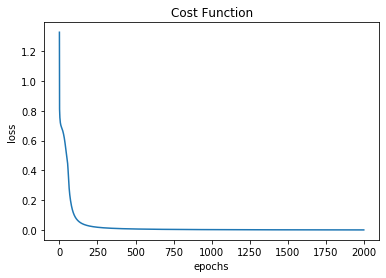

For the new input of [[0 1 1]], the output is [1]
 0.00043
 0.99863
 0.99791
 0.00250


In [3]:
# ////////// Problem 1 \\\\\\\\\\

train_inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
train_outputs = np.array([[0], [1], [1], [0]])

problem_1 = MultilayerNetwork(3, 4, 1)

eps = 2000
problem_1.train(eps, 2.8, train_inputs, train_outputs)

unknown = np.array([[0, 1, 1]])
print(
    f"For the new input of {BC.OKGREEN}{unknown}{BC.ENDC}, the output is "
    f"{BC.OKBLUE}{problem_1.predict(unknown)}{BC.ENDC}")

for number in problem_1.feed_forward(train_inputs)[0]:
    print(f"{number: 0.5f}")


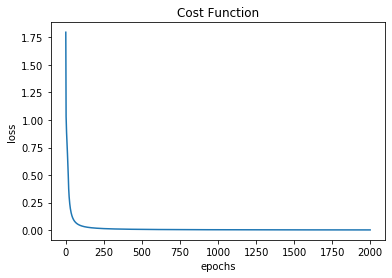

For the new input of [[ 0 -1 -1]], the output is [1, 1]


In [4]:
# ////////// Problem 2 \\\\\\\\\\

train_inputs = np.array(
    [[1, 1, 0], [1, -1, -1], [-1, 1, 1], [-1, -1, 1], [0, 1, -1], [0, -1, -1], [1, 1, 1]])
train_outputs = np.array([[1, 0], [0, 1], [1, 1], [1, 0], [1, 0], [1, 1], [1, 1]])

problem_2 = MultilayerNetwork(3, 3, 2)

eps = 2000
problem_2.train(eps, 5.0, train_inputs, train_outputs)

unknown = np.array([[0, -1, -1]])
print(
    f"For the new input of {BC.OKGREEN}{unknown}{BC.ENDC}, the output is "
    f"{BC.OKBLUE}{problem_2.predict(unknown)}{BC.ENDC}")


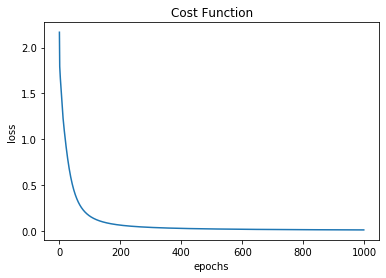

Female with car owned, willing to pay expensive travel cost and having high income level.
Suggest: Car


In [5]:
# ////////// Problem 3 \\\\\\\\\\

train_inputs = np.array(
    [[0, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 1], [1, 1, 1, 1],
     [1, 1, 2, 2], [0, 2, 2, 1], [1, 2, 2, 2]])
train_outputs = np.array(
    [[1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1],
     [0, 0, 1]])

problem_3 = MultilayerNetwork(4, 4, 3)

eps = 1000
problem_3.train(eps, 2.0, train_inputs, train_outputs)

unknown = np.array([[1, 2, 2, 2]])
result = problem_3.predict(unknown)

if unknown[0][0] == 0:
    gender = "Male"
elif unknown[0][0] == 1:
    gender = "Female"
else:
    gender = "unknown"

if unknown[0][1] == 0:
    car_ownership = "without car ownership"
elif unknown[0][1] == 1:
    car_ownership = "with car borrowed"
elif unknown[0][1] == 2:
    car_ownership = "with car owned"
else:
    car_ownership = "unknown"

if unknown[0][2] == 0:
    travel_cost = "cheap"
elif unknown[0][2] == 1:
    travel_cost = "standard"
elif unknown[0][2] == 2:
    travel_cost = "expensive"
else:
    travel_cost = "unknown"

if unknown[0][3] == 0:
    income_level = "low"
elif unknown[0][3] == 1:
    income_level = "medium"
elif unknown[0][3] == 2:
    income_level = "high"
else:
    income_level = "unknown"

if result == [1, 0, 0]:
    transportation_mode = "Bus"
elif result == [0, 1, 0]:
    transportation_mode = "Train"
elif result == [0, 0, 1]:
    transportation_mode = "Car"
else:
    transportation_mode = "unknown"

print(
    f"{gender} {car_ownership}, willing to pay {travel_cost} travel cost and having {income_level} income "
    f"level.")
print(f"Suggest: {BC.OKGREEN}{transportation_mode}{BC.ENDC}")

data = {"gender": gender, "car_ownership": car_ownership, "travel_cost": travel_cost,
        "income_level": income_level, "transportation_mode": transportation_mode}
df = pd.DataFrame(data,
                  columns=["gender", "car_ownership", "travel_cost", "income_level", "transportation_mode"],
                  index=[0])
df.to_csv("transport.csv", header=True)


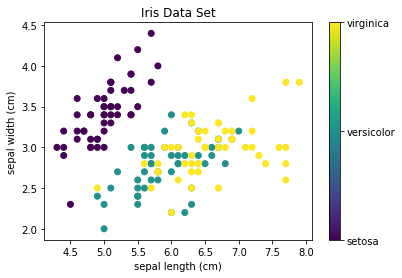

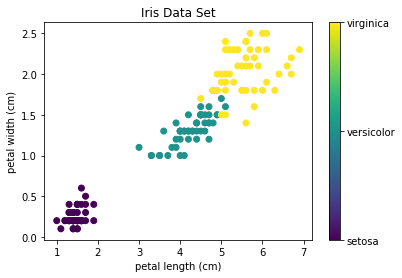

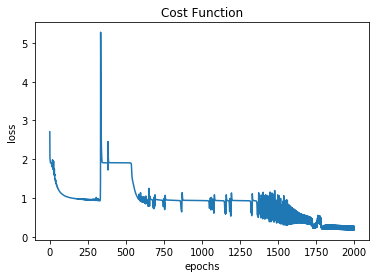

For the new input of [[5.1 3.5 1.4 0.2]], the output is Iris Setosa 


In [6]:
# ////////// Problem 4 \\\\\\\\\\

iris = load_iris()
features = iris.data.T

train_inputs = iris.data
train_outputs = iris.target
new_output = []

sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
petal_width = features[3]

sepal_length_label = iris.feature_names[0]
sepal_width_label = iris.feature_names[1]
petal_length_label = iris.feature_names[2]
petal_width_label = iris.feature_names[3]

# This formatter will label the color bar with the correct target names.
formatter = plt.FuncFormatter(lambda f, *args: iris.target_names[int(f)])

# ===== SEPAL SCATTER GRAPH =====
plt.scatter(sepal_length, sepal_width, c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title("Iris Data Set")
plt.xlabel(sepal_length_label)
plt.ylabel(sepal_width_label)

plt.show()

# ===== PETAL SCATTER GRAPH =====
plt.scatter(petal_length, petal_width, c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title("Iris Data Set")
plt.xlabel(petal_length_label)
plt.ylabel(petal_width_label)

plt.show()

for i in train_outputs:
    if i == 0:
        new_output.append([1, 0, 0])
    elif i == 1:
        new_output.append([0, 1, 0])
    else:
        new_output.append([0, 0, 1])

train_outputs = np.array(new_output)

problem_4 = MultilayerNetwork(4, 4, 3)

eps = 2000
problem_4.train(eps, 0.9, train_inputs, train_outputs)

# Setosa
unknown = np.array([[5.1, 3.5, 1.4, 0.2]])

# Versicolor
# unknown = np.array([[6.7, 3.1, 4.7, 1.5]])

# Virginica
# unknown = np.array([[7.9, 3.8, 6.4, 2.0]])

flower = problem_4.predict(unknown)

if flower == [1, 0, 0]:
    result = "Iris Setosa"
elif flower == [0, 1, 0]:
    result = "Iris Versicolour"
elif flower == [0, 0, 1]:
    result = "Iris Virginica"
else:
    result = "Could not identify flower"

print(
    f"For the new input of {BC.OKGREEN}{unknown}{BC.ENDC}, the output is "
    f"{BC.OKBLUE}{result}"
    f"{BC.ENDC} ")